In [1]:
#reads you CSV and turns it into a "Dataframe" (a table)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Warnings - control annoying messages
warnings.filterwarnings("ignore")
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',200)
#matplotlib -> default char size is 12 wide X 6 tall (inches)
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid") # Use the clean white grid background grid 
sns.set_palette('husl') #use a pleasant color palette

print(pd.__version__)
print(np.__version__)


2.2.3
2.2.2


In [ ]:
#pd.read_csv() reads your CSV file line by line and bulds a Dataframe 
#'../' means "go one folder UP" from notebooks/ to reach data/
df = pd.read_csv("C:\pratice\ecommerce-customer-analytics\data\E-commerce_Customer_Behavior.csv")
print(df.shape) #Returns Row and Columns


(348, 12)


# First Peek at the Data

In [9]:
df.head() #Default print 5 row

,Unnamed: 0,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [11]:
df.tail() # Shows the last rows 

,Unnamed: 0,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
343,345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
344,346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
345,347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
346,348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
347,349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [ ]:
# sample(10) shows 10 RANDOM rows
# WHY? head() and tail() only show beginning and end
# Random sample gives you a more honest view of the MIDDLE of the data
# It's like checking random pages of a book, not just page 1 and last page

df.sample(10,random_state=42)
# random_state=42 means: always pick the SAME random rows
# This makes your analysis reproducible — same result every time you run it

,Unnamed: 0,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
255,257,358,Female,31,New York,Gold,1160.60,15,4.5,True,29,Satisfied
114,115,216,Male,35,Los Angeles,Silver,810.90,12,4.3,False,13,Neutral
314,316,417,Female,37,Houston,Bronze,450.80,7,3.4,False,30,Neutral
268,270,371,Male,35,Los Angeles,Silver,800.90,12,4.1,False,17,Neutral
167,169,270,Male,34,Los Angeles,Silver,800.20,11,4.1,False,17,Neutral
124,125,226,Female,38,Houston,Bronze,440.90,8,3.2,False,24,Neutral
203,205,306,Female,42,Chicago,Bronze,495.25,10,3.5,True,35,Unsatisfied
224,226,327,Female,37,Houston,Bronze,430.80,7,3.4,False,23,Neutral
284,286,387,Female,36,Houston,Bronze,440.50,8,3.1,False,23,Neutral
153,155,256,Female,37,Houston,Bronze,430.80,7,3.4,False,23,Neutral


# UNDERSTAND THE COLUMNS DEEPLY

In [ ]:
# .dtypes shows the DATA TYPE of each column
# WHY IS DATA TYPE IMPORTANT?
# You can't do math on text. You can't sort numbers stored as text.
# Data type tells Python HOW to treat each column.

print(df.dtypes)                        # WHAT THE TYPES MEAN:
                                        # int64   → Whole numbers (1, 2, 100, 500)
                                        #            Example: CustomerID, NumberOfPurchases, Age
                                        #
                                        # float64 → Decimal numbers (1.5, 99.99, 3.14)
                                        #            Example: TotalSpend, SatisfactionScore
                                        #
                                        # object  → Text / Mixed (stored as Python strings)
                                        #            Example: Gender, City, MembershipType, ProductCategory
                                        #
                                        # bool    → True or False
                                        #            Example: IsReturningCustomer
                                        #
                                        # datetime64 → Dates and times
                                        #            Example: LastPurchaseDate

Unnamed: 0                    int64
customer_id                   int64
gender                       object
age                           int64
city                         object
membership_type              object
total_spend                 float64
items_purchased               int64
average_rating              float64
discount_applied               bool
days_since_last_purchase      int64
satisfaction_level           object
dtype: object


 # THE FULL PICTURE IN ONE TABLE

In [16]:
summary = pd.DataFrame({
     'Column Name'    : df.columns,
     'Data Type'      : df.dtypes.values,
     'Total Values'   : len(df),
     'Non-Null Count' : df.count().values,       # How many have actual values
     'Null Count'     : df.isnull().sum().values, # How many are MISSING
     'Unique Values'  : [df[col].nunique() for col in df.columns],  # How many distinct values
     'Sample Value'   : [df[col].iloc[0] for col in df.columns]     # First actual value
})

# Add a "Null %" column so we can easily see problem columns
summary['Null %'] = (summary['Null Count'] / len(df) * 100).round(1)

# Sort by most nulls first — so problems jump out immediately
summary = summary.sort_values('Null Count', ascending=False)
print("COMPLETE COLUMN SUMMARY")
print(summary.to_string(index=False))

COMPLETE COLUMN SUMMARY
             Column Name Data Type  Total Values  Non-Null Count  Null Count  Unique Values Sample Value  Null %
              Unnamed: 0     int64           348             348           0            348            0     0.0
             customer_id     int64           348             348           0            348          101     0.0
                  gender    object           348             348           0              2       Female     0.0
                     age     int64           348             348           0             16           29     0.0
                    city    object           348             348           0              6     New York     0.0
         membership_type    object           348             348           0              3         Gold     0.0
             total_spend   float64           348             348           0             76       1120.2     0.0
         items_purchased     int64           348             348        

# Descriptive Statistics (Making Numbers Speak)

In [ ]:
stats = df.describe().T     # .T means "transpose" — flip rows and columns
                              # So each ROW is a column from your data
                              # Makes it much easier to read
print(stats)                        

                          count        mean         std    min     25%    50%  \
Unnamed: 0                348.0  174.887931  101.304611    0.0   87.75  175.5   
customer_id               348.0  275.887931  101.304611  101.0  188.75  276.5   
age                       348.0   33.577586    4.878024   26.0   30.00   32.0   
total_spend               348.0  847.793103  361.692375  410.8  505.75  780.2   
items_purchased           348.0   12.632184    4.146079    7.0    9.00   12.0   
average_rating            348.0    4.023563    0.579145    3.0    3.50    4.1   
days_since_last_purchase  348.0   26.614943   13.474750    9.0   15.00   23.0   

                              75%     max  
Unnamed: 0                 262.25   349.0  
customer_id                363.25   450.0  
age                         37.00    43.0  
total_spend               1160.60  1520.1  
items_purchased             15.00    21.0  
average_rating               4.50     4.9  
days_since_last_purchase    38.00    63.0  

# CATEGORICAL SUMMARY (Text Columns)

In [ ]:
# Get only the object (text ) columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
     print(f"\n Column: '{col}'")
     print(f"Total Entries : {len(df)}")
     print(f"Unique values    : {df[col].nunique()}")
     print(f"Most common      : {df[col].mode()[0]}  ({df[col].value_counts().iloc[0]} times)")
     print(f"\nFull breakdown:")

     #Count how many of each value, and show the percentage
     counts = df[col].value_counts()
     percentages = df[col].value_counts(normalize=True)* 100

     breakdown = pd.DataFrame({
          'Count': counts,
          'Percentage': percentages.round(1)
     })
     print(breakdown.to_string())


 Column: 'gender'
 Total Entries : 348
   Unique values    : 2
   Most common      : Male  (175 times)

   Full breakdown:
        Count  Percentage
gender                   
Male      175        50.3
Female    173        49.7

 Column: 'city'
 Total Entries : 348
   Unique values    : 6
   Most common      : Los Angeles  (59 times)

   Full breakdown:
               Count  Percentage
city                            
New York          59        17.0
Los Angeles       59        17.0
Chicago           58        16.7
San Francisco     58        16.7
Miami             58        16.7
Houston           56        16.1

 Column: 'membership_type'
 Total Entries : 348
   Unique values    : 3
   Most common      : Gold  (117 times)

   Full breakdown:
                 Count  Percentage
membership_type                   
Gold               117        33.6
Silver             117        33.6
Bronze             114        32.8

 Column: 'satisfaction_level'
 Total Entries : 348
   Unique values    

# Missing Values - The Deep Checks


In [21]:
#count missing values per column 
missing_count = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) *100).round(2)

#Build a clean table shwoing only column with missing data
missing_df = pd.DataFrame({
     'Column'     : missing_count.index,
     'Missing'    : missing_count.values,
     'Percentage' : missing_pct.values,
     'Present'    : (len(df) - missing_count).values
}).sort_values('Missing', ascending=False)

# Show only columns that actually have missing values
has_missing = missing_df[missing_df['Missing'] > 0]

if len(has_missing) == 0:
     print("\n GREAT NEWS! No missing values found in any column.")
     print("   Your dataset is complete — no cleaning needed for nulls.")
else:
     print(f"\n Found missing values in {len(has_missing)} column(s):\n")
     print(has_missing.to_string(index=False))
     
     # Visualize it — humans understand charts better than numbers
     plt.figure(figsize=(10, 5))
     plt.bar(has_missing['Column'], has_missing['Percentage'], color='salmon', edgecolor='black')
     plt.xlabel('Column Name', fontsize=12)
     plt.ylabel('Missing %', fontsize=12)
     plt.title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
     plt.xticks(rotation=45, ha='right')
     plt.tight_layout()
     plt.savefig('../reports/figures/missing_values.png', dpi=150)
     plt.show()

# Also run this — shows ALL columns including those with zero missing
print("\n\nFULL MISSING VALUE TABLE (all columns):")
print(missing_df.to_string(index=False))


 GREAT NEWS! No missing values found in any column.
   Your dataset is complete — no cleaning needed for nulls.


FULL MISSING VALUE TABLE (all columns):
                  Column  Missing  Percentage  Present
              Unnamed: 0        0         0.0      348
             customer_id        0         0.0      348
                  gender        0         0.0      348
                     age        0         0.0      348
                    city        0         0.0      348
         membership_type        0         0.0      348
             total_spend        0         0.0      348
         items_purchased        0         0.0      348
          average_rating        0         0.0      348
        discount_applied        0         0.0      348
days_since_last_purchase        0         0.0      348
      satisfaction_level        0         0.0      348


# VISUALIZE NUMERICAL DISTRIBUTIONS

Numerical columns found: ['Unnamed: 0', 'customer_id', 'age', 'total_spend', 'items_purchased', 'average_rating', 'days_since_last_purchase']
Creating distribution plots...



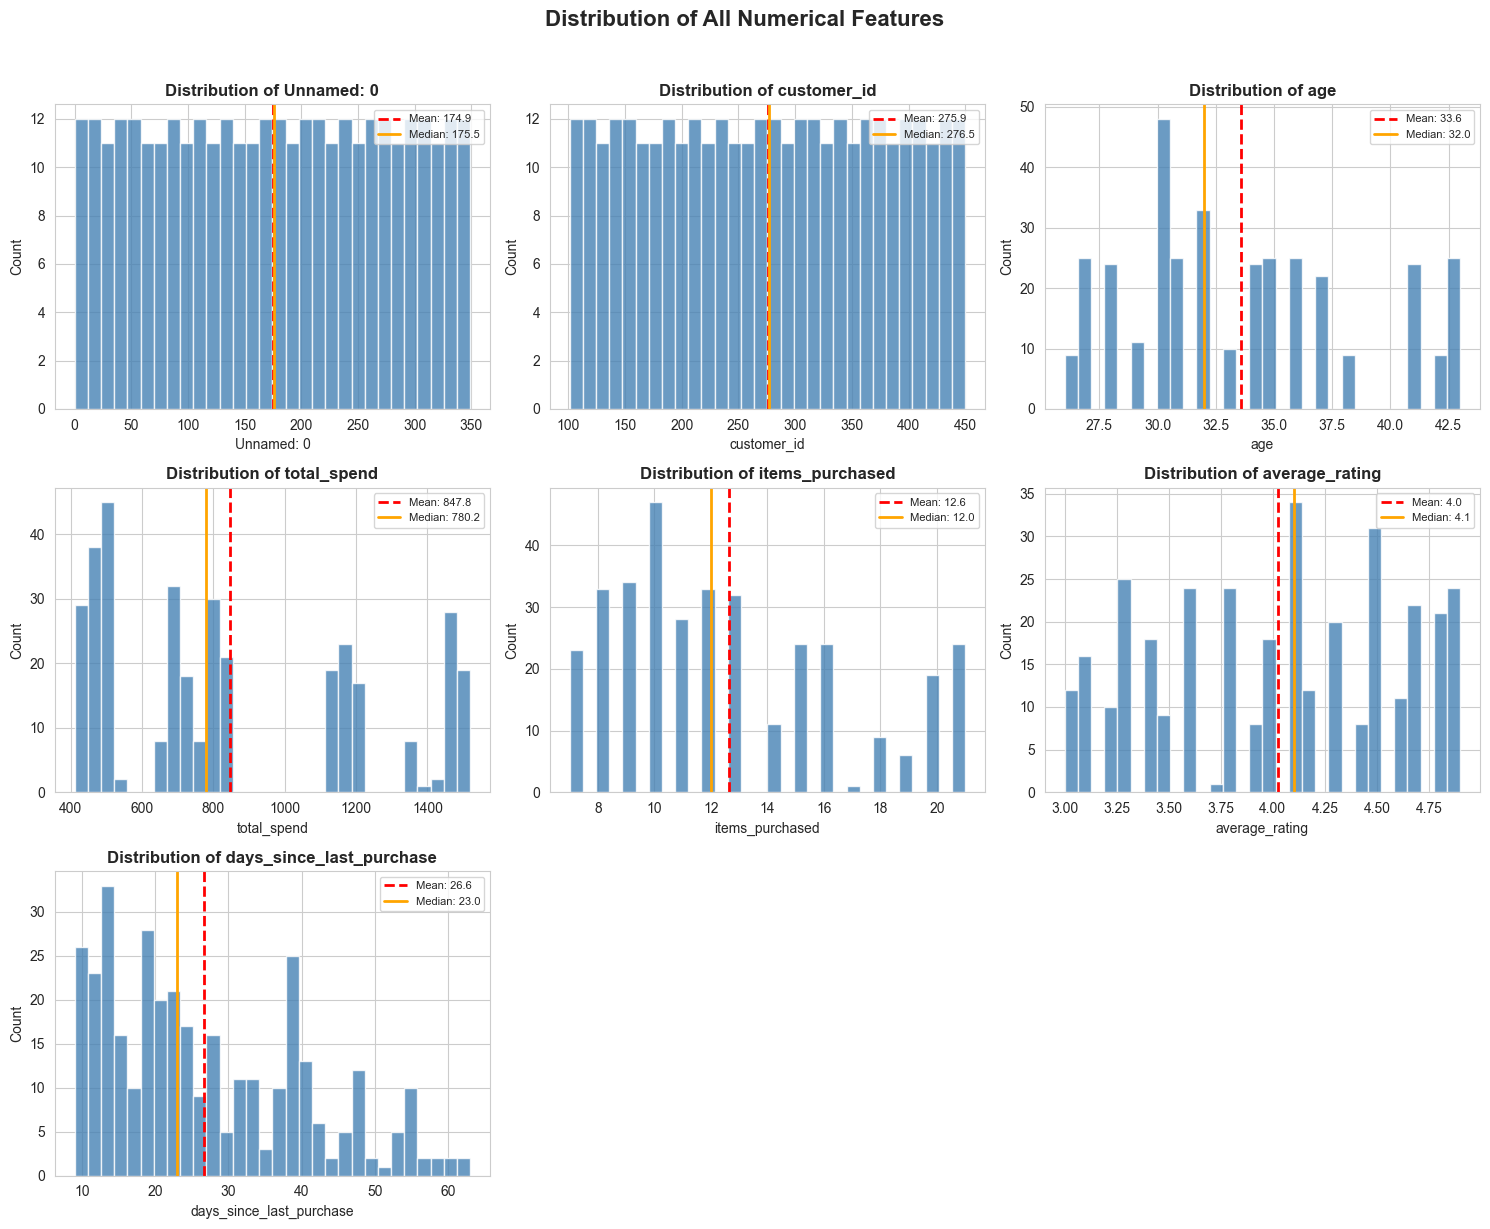

✅ Chart saved to reports/figures/01_distributions.png


In [ ]:
# ============================================================
# CELL 12 — VISUALIZE NUMERICAL DISTRIBUTIONS
# ============================================================

# WHY DO WE VISUALIZE DISTRIBUTIONS?
#
# A number like "average spend = $450" hides the SHAPE of the data.
# Are all customers spending close to $450?
# Or is it split: half spend $50, and half spend $850?
# Only a chart reveals the TRUE picture.
#
# HISTOGRAM: Shows how values are distributed
# X-axis = value ranges (called "bins")
# Y-axis = how many customers fall in each range

# Get all numerical columns automatically
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Numerical columns found: {num_cols}")
print(f"Creating distribution plots...\n")

# Calculate layout
n_cols = 3  # 3 charts per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Make it a simple list instead of a grid

for i, col in enumerate(num_cols):
     
     # Draw the histogram
     axes[i].hist(
          df[col].dropna(),    # Remove any missing values first
          bins=30,             # Divide into 30 groups — good default
          color='steelblue',   # Bar color
          edgecolor='white',   # White border between bars (easier to read)
          alpha=0.8            # Slightly transparent
     )
     
     # Add a vertical line at the MEAN (average)
     mean_val = df[col].mean()
     axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
     
     # Add a vertical line at the MEDIAN
     median_val = df[col].median()
     axes[i].axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Median: {median_val:.1f}')
     
     axes[i].set_title(f'Distribution of {col}', fontweight='bold')
     axes[i].set_xlabel(col)
     axes[i].set_ylabel('Count')
     axes[i].legend(fontsize=8)

# Hide any empty subplot spaces
for j in range(len(num_cols), len(axes)):
     axes[j].set_visible(False)

plt.suptitle('Distribution of All Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/01_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Chart saved to reports/figures/01_distributions.png")

### How to READ a Histogram:

# If the chart looks like a MOUNTAIN (bell shape):
# → Normal distribution — most customers are "average"

# If the chart is SKEWED RIGHT (long tail on right):
# → Most customers spend LOW, but a few spend very HIGH
# → You probably have some VIP big spenders

# If the chart has TWO HUMPS:
# → Two distinct customer groups! (e.g., casual vs premium shoppers)
# → This is extremely valuable business information

# If the chart is FLAT:
# → Values are spread evenly — no particular pattern



# — MEAN vs MEDIAN

In [27]:

for col in num_cols:
     mean   = df[col].mean()
     median = df[col].median()
     diff   = abs(mean - median)
     diff_pct = (diff / median * 100).round(1)

     print(f" {col}")
     print(f"   Mean   : {mean:.2f}")
     print(f"   Median : {median:.2f}")
     print(f"   Gap    : {diff:.2f} ({diff_pct}%)")
     
     if diff_pct > 10:
          print(f"Large gap — data is SKEWED. Outliers are pulling the mean.")
          print(f"      Use MEDIAN for a more honest 'typical' value.")
     else:
          print(f"Mean ≈ Median — data is fairly symmetric.")
     print()

 Unnamed: 0
   Mean   : 174.89
   Median : 175.50
   Gap    : 0.61 (0.3%)
Mean ≈ Median — data is fairly symmetric.

 customer_id
   Mean   : 275.89
   Median : 276.50
   Gap    : 0.61 (0.2%)
Mean ≈ Median — data is fairly symmetric.

 age
   Mean   : 33.58
   Median : 32.00
   Gap    : 1.58 (4.9%)
Mean ≈ Median — data is fairly symmetric.

 total_spend
   Mean   : 847.79
   Median : 780.20
   Gap    : 67.59 (8.7%)
Mean ≈ Median — data is fairly symmetric.

 items_purchased
   Mean   : 12.63
   Median : 12.00
   Gap    : 0.63 (5.3%)
Mean ≈ Median — data is fairly symmetric.

 average_rating
   Mean   : 4.02
   Median : 4.10
   Gap    : 0.08 (1.9%)
Mean ≈ Median — data is fairly symmetric.

 days_since_last_purchase
   Mean   : 26.61
   Median : 23.00
   Gap    : 3.61 (15.7%)
Large gap — data is SKEWED. Outliers are pulling the mean.
      Use MEDIAN for a more honest 'typical' value.



In [28]:
df.to_csv("../data/ecommerece-backup.csv",index=False)